#   [Project Name]:-)       [ "Water Quality Prediction" ]

In [1]:
import numpy as np #This line imports the pandas library and assigns it the alias pd. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
wqp=pd.read_csv('water_potability.csv') #This line reads a CSV.
wqp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
wqp.duplicated().any() # Way to check for the presence of duplicate rows in a DataFrame

False

In [4]:
wqp.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
wqp.shape

(3276, 10)

In [6]:
wqp.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
wqp.isnull().sum() #Check for missing values (null values) in a DataFrame

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
null_df = wqp.isnull().sum().reset_index()
null_df.columns = ['column', 'Null_count']
null_df['%miss_value'] = round(null_df['Null_count']/len(wqp),2)*100
null_df #calculate the percentage of missing values in each column of a DataFrame

,column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


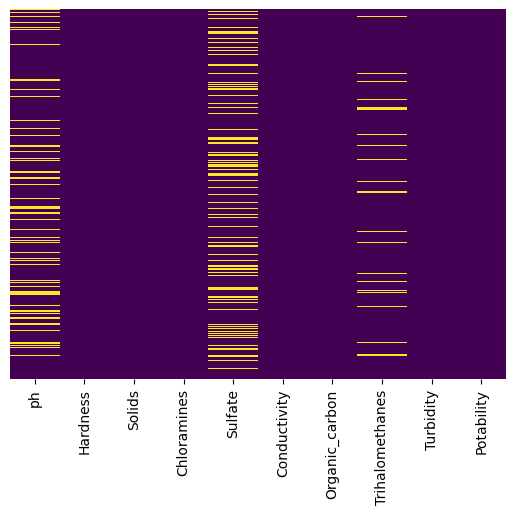

In [9]:
sns.heatmap(wqp.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()  # Visualize the missing values in a DataFrame

# [ Handiling Missing Values ]

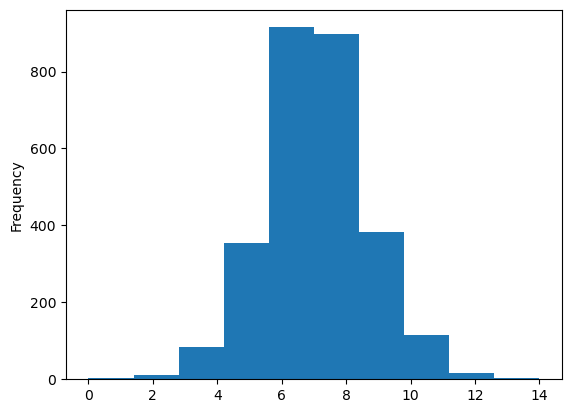

In [10]:
wqp['ph'].plot(kind = 'hist')
plt.show()
#Create and display a histogram of the 'ph' column in the DataFrame

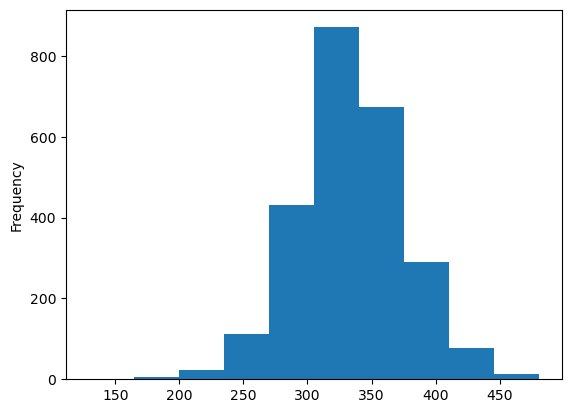

In [11]:
wqp['Sulfate'].plot(kind = 'hist')
plt.show()




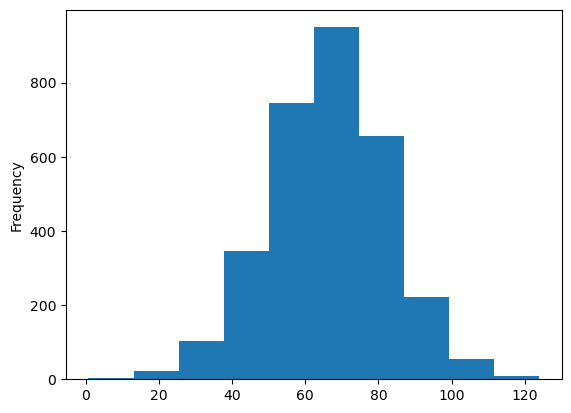

In [12]:
wqp['Trihalomethanes'].plot(kind = 'hist')
plt.show()


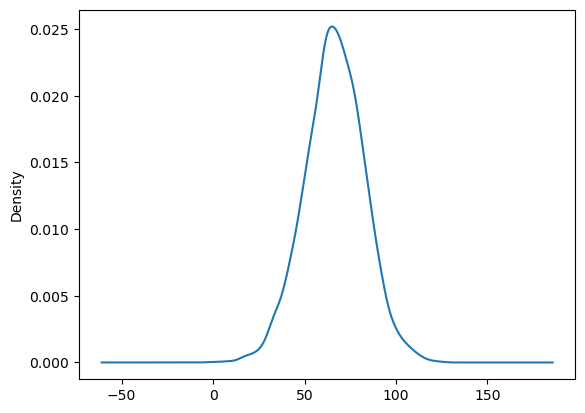

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
wqp['Trihalomethanes'].plot(kind='kde', ax=ax)
plt.show() #Create and display a kernel density estimate (KDE) plot 

In [14]:
wqp['ph'] = wqp['ph'].fillna(wqp['ph'].mean())
wqp['Trihalomethanes'] = wqp['Trihalomethanes'].fillna(wqp['Trihalomethanes'].mean())
wqp['Sulfate'] = wqp['Sulfate'].fillna(wqp['Sulfate'].mean())
#Its used to handle missing values in the 'ph' column of the DataFrame wqp by replacing them with the mean value of that column.

In [15]:
wqp.isnull().sum() #Identify and count missing values 

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

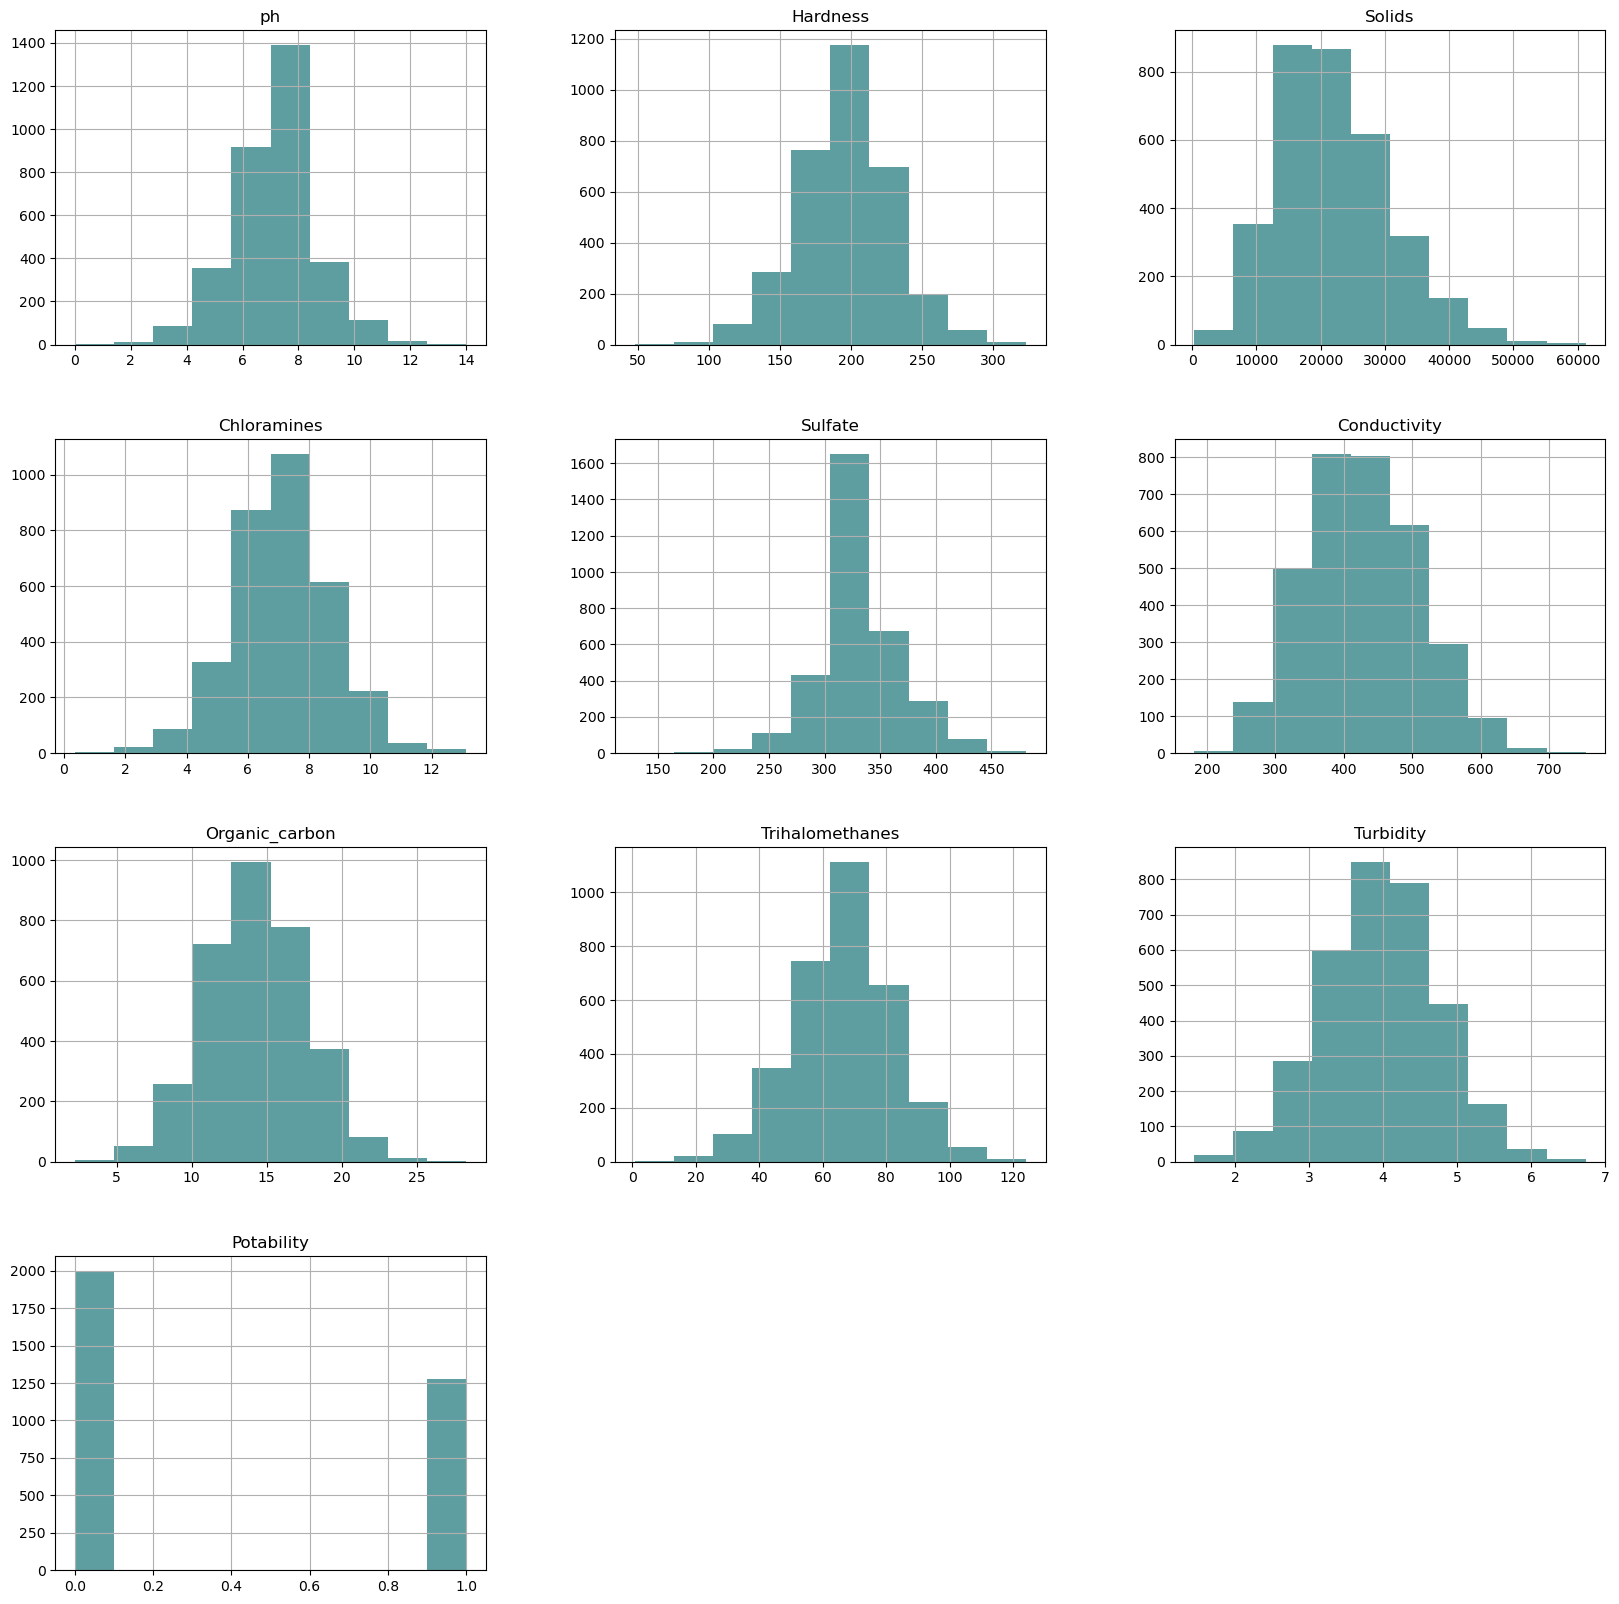

In [16]:
data_hist_plot = wqp.hist(figsize = (20,20), color = "#5F9EA0") #Creating a histogram plot using data from wqp with specified figure size and color.

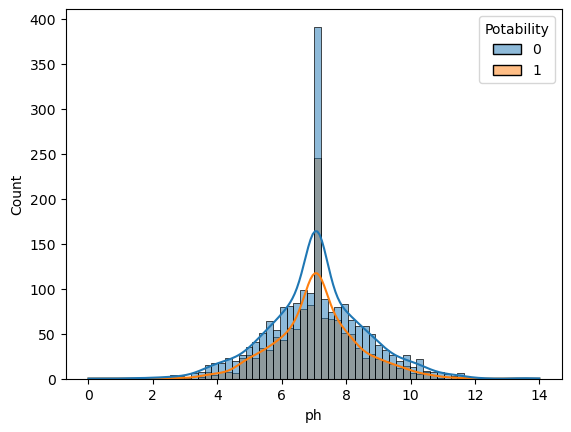

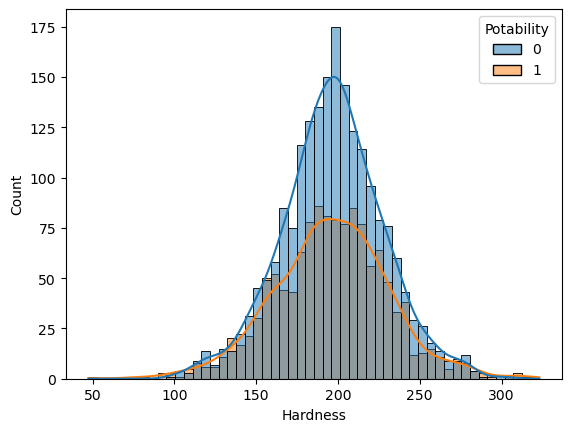

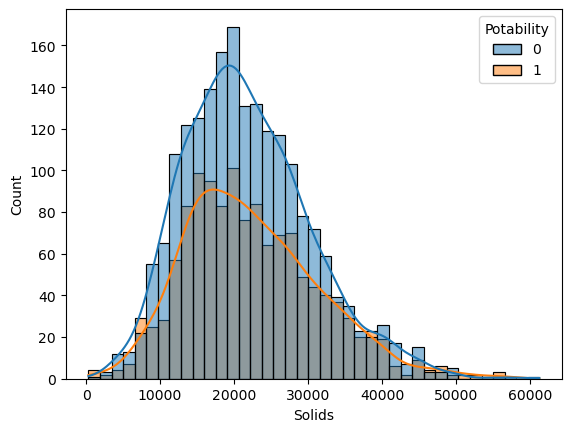

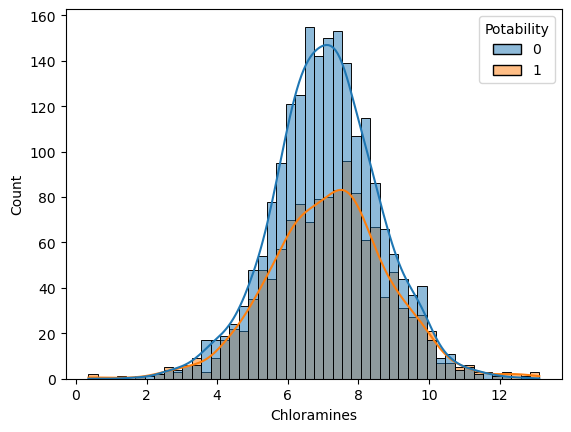

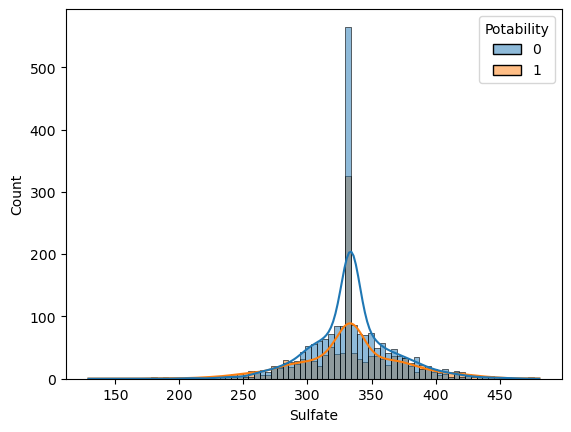

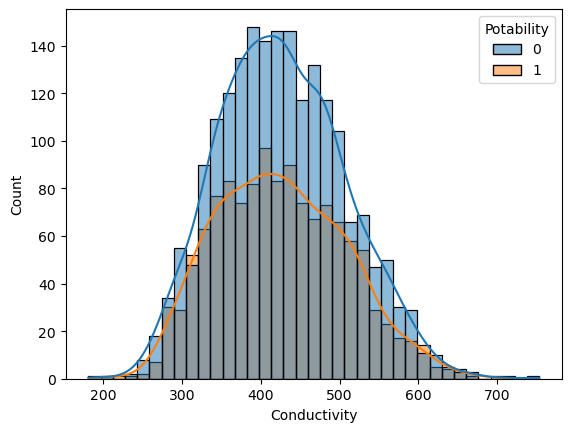

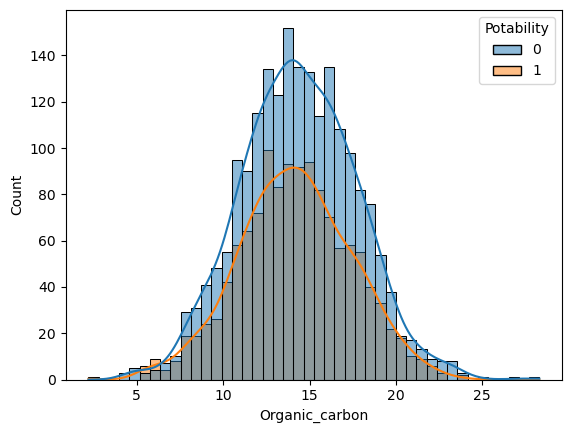

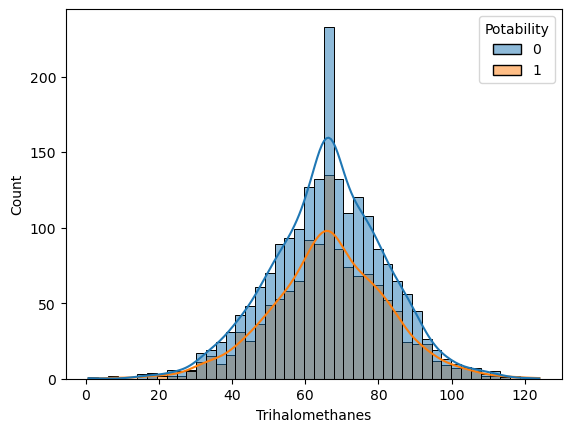

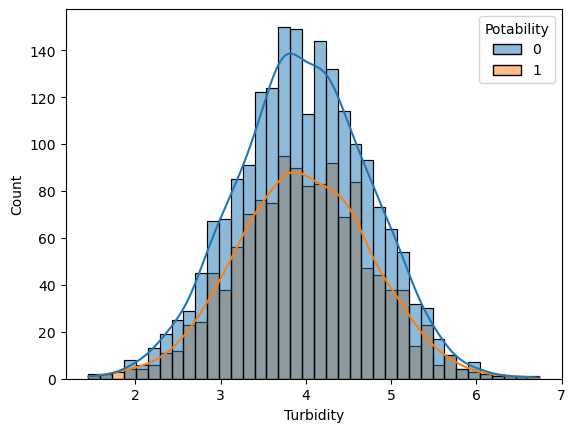

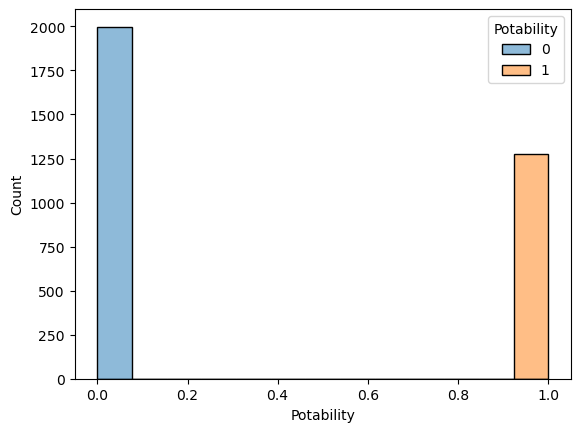

In [17]:
for col in wqp.columns:
    sns.histplot(data=wqp, x=col, kde=True, hue= 'Potability')
    plt.show()

In [18]:
wqp.groupby('Potability').mean().T #Calculating the mean of each column in the DataFrame wqp, grouped by 'Potability', and then transposing the result for better readability or further analysis.

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


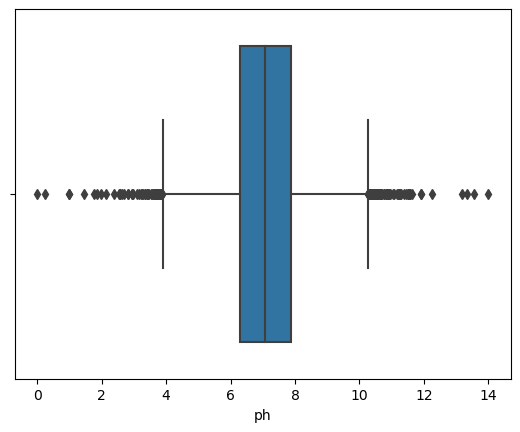

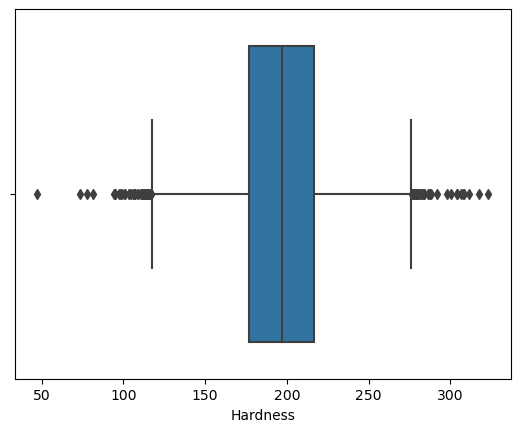

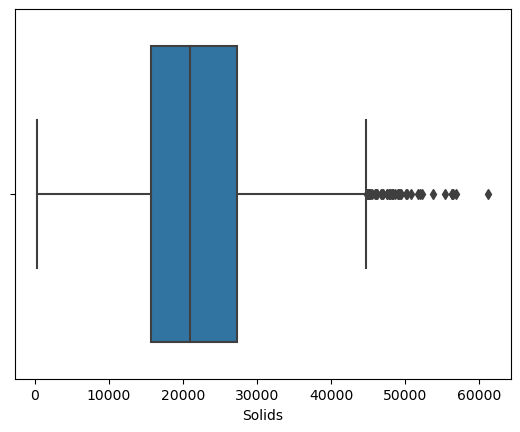

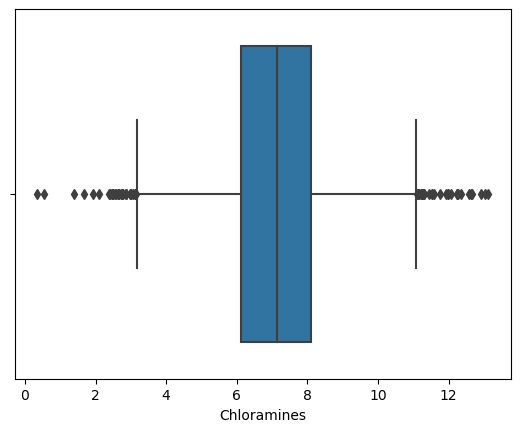

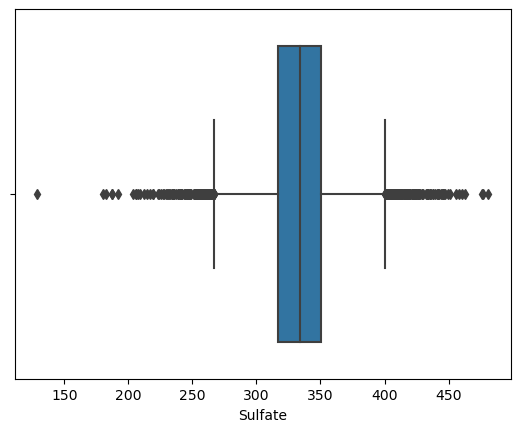

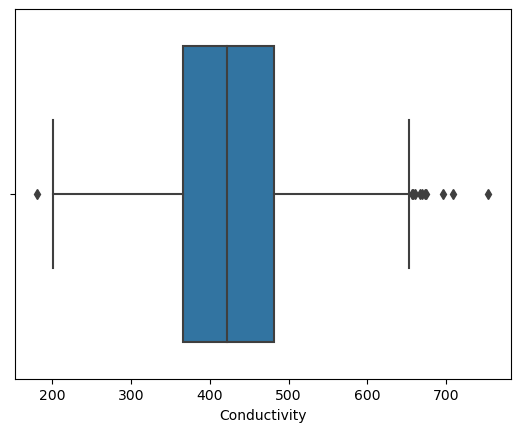

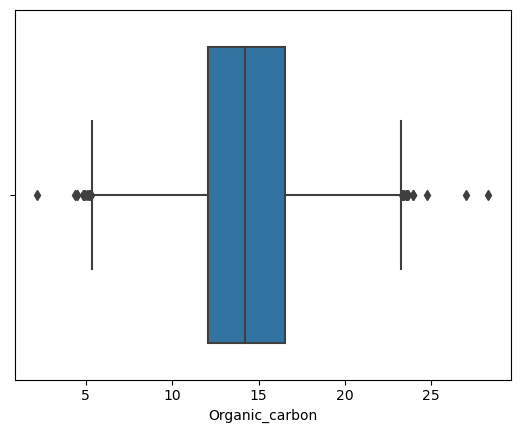

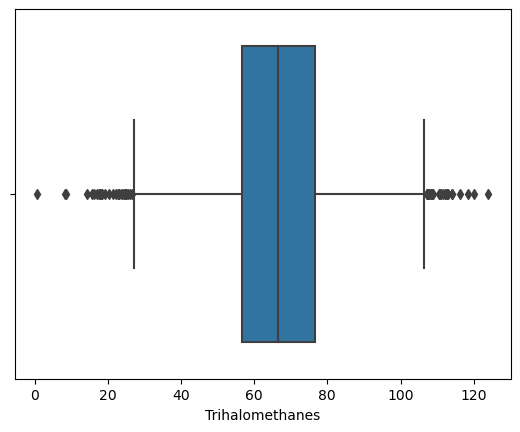

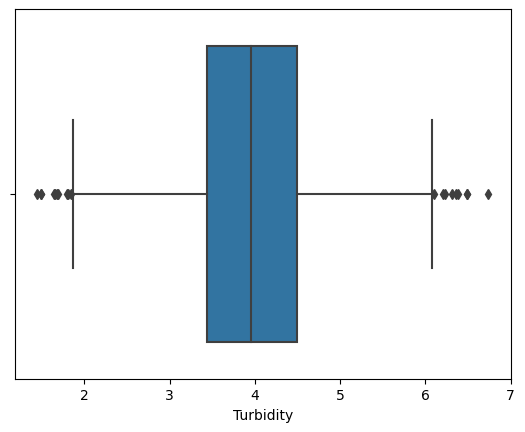

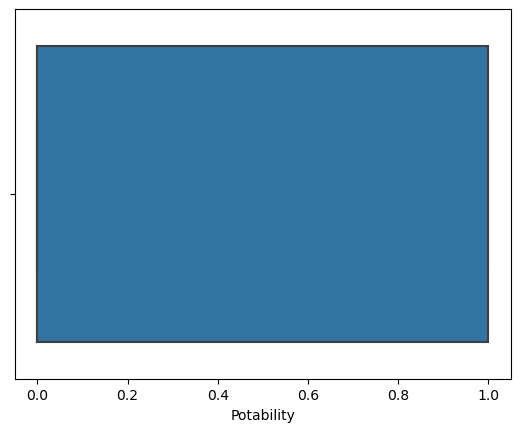

In [19]:
for col in wqp.columns:
    sns.boxplot(data=wqp, x=col)
    plt.show() #Creating box plots for each column in the DataFrame wqp to visualize the distribution of data and identify outliers.

<Axes: ylabel='count'>

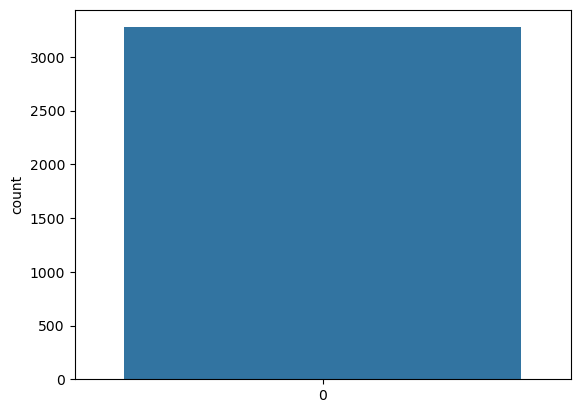

In [20]:
sns.countplot(wqp['Potability']) #Creating a count plot to visualize the distribution of 'Potability' values in the DataFrame wqp.

<Axes: xlabel='Potability'>

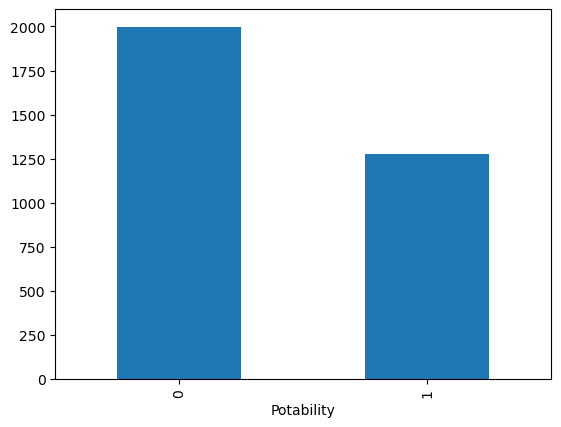

In [21]:
wqp['Potability'].value_counts().plot(kind = 'bar') #Creating a bar plot to display the count of each 'Potability' category in the DataFrame wqp.

In [22]:
x = wqp.drop('Potability', axis = 1)
y = wqp['Potability'] #Splitting the DataFrame `wqp` into features (independent variables) stored in `x` and the target variable 'Potability' stored in `y`.

In [23]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

# [Feature Scslling]

In [25]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #Importing the StandardScaler class from scikit-learn's preprocessing module for standardizing features.

In [26]:
x_scaled = std_scaler.fit_transform(x)
x_scaled #Standardizing the features in the DataFrame `x` using the StandardScaler object `std_scaler`, and storing the scaled features in `x_scaled`.

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

# [Training and Testing Dataset]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42, stratify= y) #The code splits the dataset into training and testing sets (`x_train`, `x_test`, `y_train`, `y_test`) with a ratio of 80% training data and 20% testing data, ensuring that the class distribution is preserved (stratified sampling) based on the target variable `y`, and using a fixed random seed for reproducibility.

In [28]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

# [Model Development]

In [29]:
from sklearn.linear_model import LogisticRegression as LR  #  LR = LogisticRegression()
                                                           # DT = DecisionTreeClassifier()
                                                           # RF = RandomForestClassifier()
                                                           # ETC = ExtraTreesClassifier()
                                                           # SVM = SVC()
                                                           # KNN = KNeighborsClassifier()
                                                           # GBC = GradientBoostingClassifier()
                                                           # ABC = AdaBoostClassifier()
                                                           # NB =GaussianNB()
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF, ExtraTreesClassifier as ETC, GradientBoostingClassifier as GBC, AdaBoostClassifier as ABC
from sklearn.svm import SVC as SVM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.model_selection import cross_val_score
import pandas as pd


models = [LR(), DT(), RF(), ETC(), SVM(), KNN(), GBC(), ABC(), NB()] # Define models
features = x_scaled
labels = y
cv = 5
accu_list = []  # Accuracy List
ModelName = []  # Model Name List

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=cv)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)


model_acc_df = pd.DataFrame({"Model": ModelName, "Cross_val_Accuracy": accu_list})
model_acc_df #Creating a DataFrame model_acc_df to store model names (ModelName) and their corresponding cross-validation accuracies (accu_list).

,Model,Cross_val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.601331
2,RandomForestClassifier,63.736874
3,ExtraTreesClassifier,63.614783
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,GradientBoostingClassifier,61.508797
7,AdaBoostClassifier,59.249488
8,GaussianNB,61.263871


In [30]:
from sklearn.metrics import classification_report

In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import classification_report


svm_model = SVC() #Create instances of the models
etc_model = ExtraTreesClassifier()
rf_model = RandomForestClassifier()

# Fit the models to the training data
svm_model.fit(x_train, y_train)
etc_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

# Predict using the trained models
y_pred_rf = rf_model.predict(x_test)
y_pred_svm = svm_model.predict(x_test)
y_pred_etc = etc_model.predict(x_test)



In [32]:
print(classification_report(y_test, y_pred_rf)) #print the classification reports if needed


print(classification_report(y_test, y_pred_svm))


print(classification_report(y_test, y_pred_etc))


              precision    recall  f1-score   support

           0       0.66      0.87      0.75       400
           1       0.61      0.31      0.41       256

    accuracy                           0.65       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.64      0.65      0.62       656

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       400
           1       0.64      0.28      0.39       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656



C:\Users\shoro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shoro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shoro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


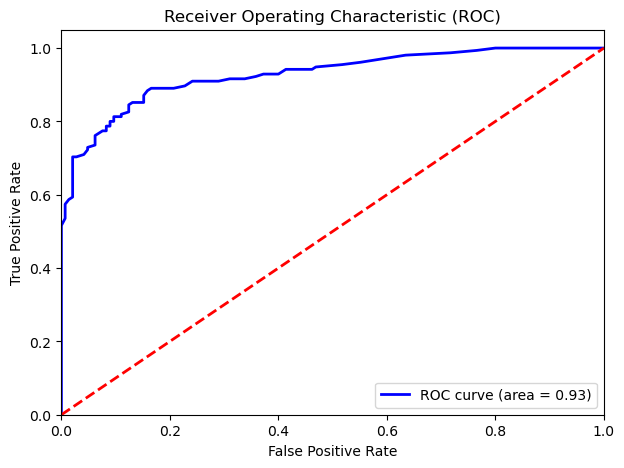

In [33]:
import matplotlib.pyplot as plt #Import necessary libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=20, random_state=42) #Create a synthetic dataset


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Split the dataset into training and test sets


ETC = ExtraTreesClassifier(random_state=42) #Initialize and train the ExtraTreesClassifier
ETC.fit(x_train, y_train)


y_scores = ETC.predict_proba(x_test)[:, 1] #Predict probabilities


fpr, tpr, thresholds = roc_curve(y_test, y_scores) #Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(7, 5)) #Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


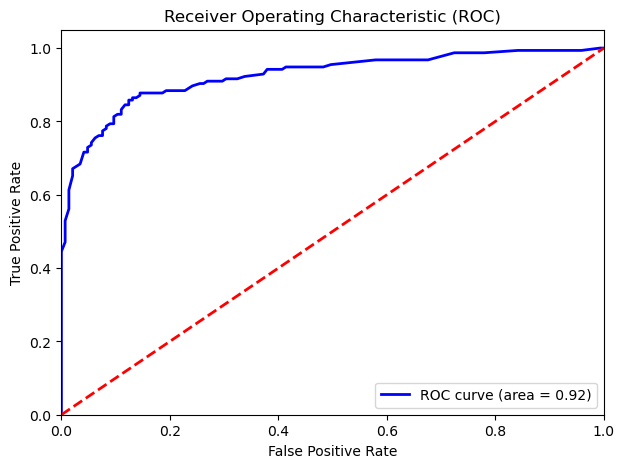

In [34]:
import matplotlib.pyplot as plt #Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, random_state=42) #Create a synthetic dataset


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Split the dataset into training and test sets


RF = RandomForestClassifier(random_state=42) #Initialize and train the RandomForestClassifier
RF.fit(x_train, y_train)


y_scores = RF.predict_proba(x_test)[:, 1] #Predict probabilities


fpr, tpr, thresholds = roc_curve(y_test, y_scores) #Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(7, 5)) #Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Corrected linestyle
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')  # Corrected title
plt.legend(loc="lower right")
plt.show()


# [Best Model - Ranndom Forest]

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the hyperparameters and cross-validation method
params_RF = {
    "min_samples_split": [2, 6],
    "min_samples_leaf": [1, 4],
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", "entropy"]
}
cv_method = StratifiedKFold(n_splits=3)

# Initialize GridSearchCV with RandomForestClassifier
GridSearchCV_RF = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params_RF,
    cv=cv_method,
    verbose=1,
    n_jobs=2,
    scoring="accuracy",
    return_train_score=True
)


GridSearchCV_RF.fit(x_train, y_train) #Fit the model with training data


best_params_RF = GridSearchCV_RF.best_params_ #Get the best parameters
print("Best Hyperparameters for Random Forest are =", best_params_RF)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are = {'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 300}


In [36]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator

RandomForestClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=6, n_estimators=300)

In [37]:
best_estimator = GridSearchCV_RF.best_estimator_
GridSearchCV_RF.fit(x_train, y_train)
y_pred_best = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       145
           1       0.89      0.85      0.87       155

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [38]:
from sklearn.metrics import accuracy_score
print(f"Accuraccy of Random Forest Model = {round(accuracy_score(y_test, y_pred_best)*100,2)}%")

Accuraccy of Random Forest Model = 86.67%


 # [Predictive System]

In [39]:
wqp.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [40]:
list01 = wqp.iloc[2:3, 0:9].values.flatten().tolist()
list01

[8.099124189298397,
 224.23625939355776,
 19909.541732292397,
 9.275883602694089,
 333.7757766108135,
 418.6062130644815,
 16.868636929550973,
 66.42009251176368,
 3.0559337496641685]

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have some training data to fit the scaler

X_train = np.array([
    [7.0, 150, 20000, 0.5, 300, 500, 10.0, 80.0, 2.0],
    [6.5, 180, 22000, 0.6, 310, 520, 11.0, 90.0, 2.5],
    [7.2, 170, 21000, 0.7, 305, 510, 10.5, 85.0, 2.2],
    [6.8, 160, 20500, 0.55, 295, 505, 10.2, 82.0, 2.1]
])
y_train = np.array([1, 0, 1, 0])  #Example labels


std_scaler = StandardScaler() #Fit the StandardScaler with the training data
std_scaler.fit(X_train)


best_estimator = LogisticRegression() #Train a simple model (e.g., Logistic Regression)
best_estimator.fit(X_train, y_train)

# Function to get user input for a parameter with validation
def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Error: Please enter a valid number.")

# Main program to collect water quality parameters
def main():
    ph = get_float_input('Enter the pH value: ')
    hardness = get_float_input('Enter the Hardness value: ')
    solids = get_float_input('Enter the Solids value: ')
    chloramines = get_float_input('Enter the Chloramines value: ')
    sulfate = get_float_input('Enter the Sulfate value: ')
    conductivity = get_float_input('Enter the Conductivity value: ')
    organic_carbon = get_float_input('Enter the Organic Carbon value: ')
    trihalomethanes = get_float_input('Enter the Trihalomethanes value: ')
    turbidity = get_float_input('Enter the Turbidity value: ')
    
    # Storing the collected values in a list
    input_data = [ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]
    
    # Optional: Additional validation for specific ranges can be added here
    # Printing out the collected values (optional)
    print("\nCollected water quality parameters:")
    print(f"pH: {ph}")
    print(f"Hardness: {hardness}")
    print(f"Solids: {solids}")
    print(f"Chloramines: {chloramines}")
    print(f"Sulfate: {sulfate}")
    print(f"Conductivity: {conductivity}")
    print(f"Organic Carbon: {organic_carbon}")
    print(f"Trihalomethanes: {trihalomethanes}")
    print(f"Turbidity: {turbidity}")
    
    
    water_data_input = std_scaler.transform([input_data]) #Transform the input data using the standard scaler
    print("\nTransformed water data input:")
    print(water_data_input)
    
    return water_data_input

# Calling the main function to run the program and get the transformed input data
if __name__ == "__main__":
    water_data_input = main()

    
    model_prediction = best_estimator.predict(water_data_input) #Make a prediction with the trained model
    print("\nModel prediction:")
    print(model_prediction)


Enter the pH value: 8.1
Enter the Hardness value: 224.5
Enter the Solids value: 19000
Enter the Chloramines value: 9.5
Enter the Sulfate value: 335
Enter the Conductivity value: 420
Enter the Organic Carbon value: 17
Enter the Trihalomethanes value: 66.5
Enter the Turbidity value: 3.5

Collected water quality parameters:
pH: 8.1
Hardness: 224.5
Solids: 19000.0
Chloramines: 9.5
Sulfate: 335.0
Conductivity: 420.0
Organic Carbon: 17.0
Trihalomethanes: 66.5
Turbidity: 3.5

Transformed water data input:
[[  4.7370088    5.32184179  -2.53546276 120.51899672   5.81377674
  -12.00119042  17.4559231   -4.71243551   6.94879229]]

Model prediction:
[1]


In [42]:
# Assuming your binary classifier was trained with the following labels:
# 1 -> Good Quality
# 0 -> Poor Quality

model_prediction = best_estimator.predict(water_data_input)

if model_prediction == 1:
    print("\nModel prediction: Water is  'Safe' for consumuptio " )
else:
    print("\nModel prediction: Water is 'Not Safe' for consumuptio ")



Model prediction: Water is  'Safe' for consumuptio 


In [43]:
def water_Quality_prediction(input_data):
    scaled_data = std_scaler.transform([input_data])
    model_prediction = best_estimator.predict(scaled_data)
    if model_prediction[0] == 0:
        return "Water is 'Safe' for consumuptio "
    else:
         return "Water is 'Not Safe' for consumuptio "
        

In [44]:
    ph = get_float_input('Enter the pH value: ')
    hardness = get_float_input('Enter the Hardness value: ')
    solids = get_float_input('Enter the Solids value: ')
    chloramines = get_float_input('Enter the Chloramines value: ')
    sulfate = get_float_input('Enter the Sulfate value: ')
    conductivity = get_float_input('Enter the Conductivity value: ')
    organic_carbon = get_float_input('Enter the Organic Carbon value: ')
    trihalomethanes = get_float_input('Enter the Trihalomethanes value: ')
    turbidity = get_float_input('Enter the Turbidity value: ')
    
   
    input_data = [ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]
    water_Quality_prediction(input_data)
    

Enter the pH value: 7.654
Enter the Hardness value: 240
Enter the Solids value: 14245
Enter the Chloramines value: 6.28
Enter the Sulfate value: 373
Enter the Conductivity value: 416
Enter the Organic Carbon value: 10.46
Enter the Trihalomethanes value: 85.85
Enter the Turbidity value: 2.43


"Water is 'Not Safe' for consumuptio "